In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os 

In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(os.path.join(os.getcwd(),'data/train.csv'))

In [4]:
df.set_index('Id',inplace=True)

## Exploratory Data Analysis

In [12]:
df.shape

(1460, 80)

In [13]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df.corr()
## High numeric corr variables: OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


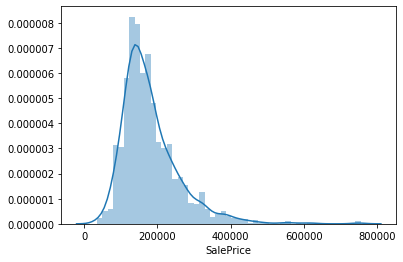

In [15]:
## SalePrice distribution: the mode is within range(100k and 150k) 
## with long tailed outlier, right skwed
sns.distplot(df['SalePrice'])

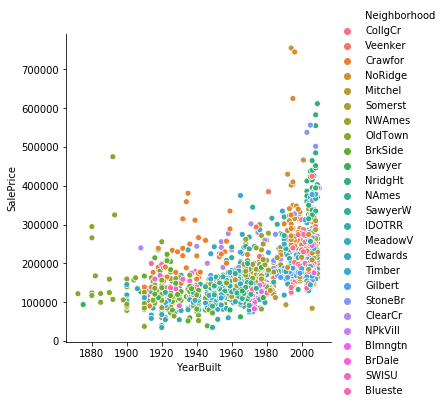

In [16]:
sns.relplot(x='YearBuilt',y='SalePrice',hue='Neighborhood',data=df)
## SalesPrice is on upward trend with YearBuilt, houses more valuable when built after 2000 & around hood such as: NoRidge(outlier),NridgHt,StoneBr

In [17]:
df[df.SalePrice>500000][['Neighborhood','SalePrice']].sort_values(by='SalePrice',ascending=False)

,Neighborhood,SalePrice
Id,,
692,NoRidge,755000
1183,NoRidge,745000
1170,NoRidge,625000
899,NridgHt,611657
804,NridgHt,582933
1047,StoneBr,556581
441,NridgHt,555000
770,StoneBr,538000
179,StoneBr,501837


Text(0.5, 1.0, 'YearBuilt vs SalePrice')

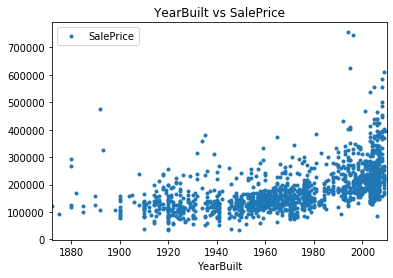

In [18]:
## linear relationship between YearBuilt and SalePrice
df.plot(x='YearBuilt',y='SalePrice',marker='.',linestyle='')
plt.title('YearBuilt vs SalePrice')

(array([1860., 1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 9 Text xticklabel objects>)

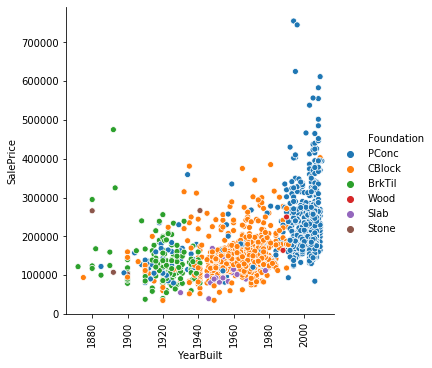

In [19]:
sns.relplot(x='YearBuilt',y='SalePrice',hue='Foundation',data=df)
plt.xticks(rotation =90)

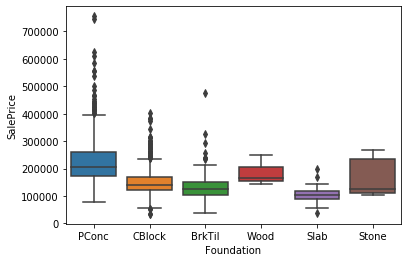

In [20]:
## Foundation: PConc based has highest avg. SalePrice, followed by Wood, Stone based has the widest range of price. 
sns.boxplot(x='Foundation',y='SalePrice',data=df)

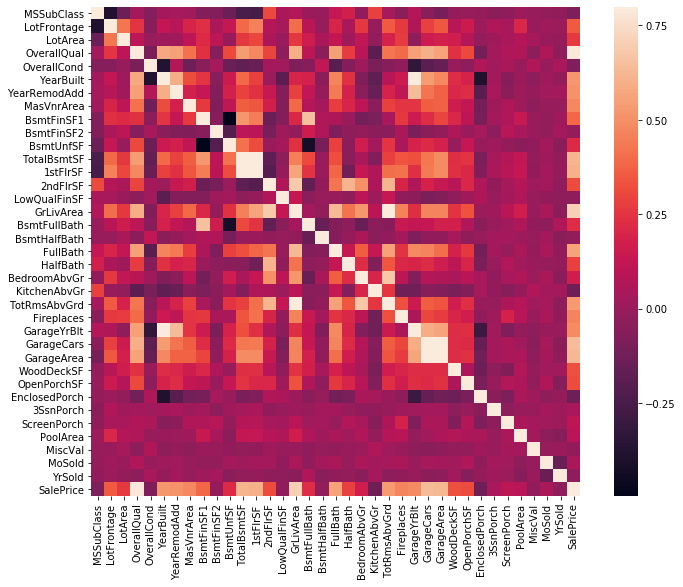

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

## Missing Data

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [23]:
df=df.drop((missing_data[missing_data.total>1]).index,1)
df=df.drop(df.loc[df.Electrical.isnull()].index)


#### Standardise the data to normal distribution ( gaussian with 0 mean and unit variance of 1)

In [58]:
## StandardScaler trasfomration requries 2D array
scaled = StandardScaler().fit_transform(df.SalePrice[:,np.newaxis])

In [98]:
low_range= scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]

In [117]:
## Drop GrLivArea two outliers 
df = df.drop(df.loc[df.index.isin([1299,524])].index)

In [ ]:
sns.distplot(df.SalePrice,fit=norm)
fig=plt.figure()
stats.probplot(df.SalePrice,plot=plt)

#### Log transform the data to have normal distribution plot for SalePrice

In [128]:
df.SalePrice= np.log(df.SalePrice)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3986736383757874, 12.024005414589174, 0.9954027633642688))

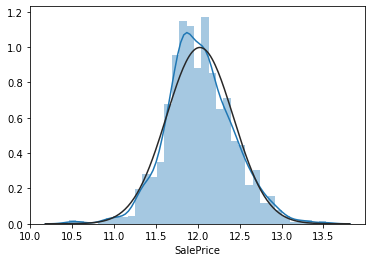

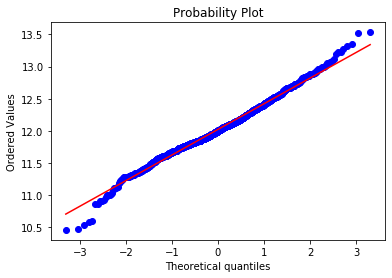

In [130]:
sns.distplot(df.SalePrice,fit=norm)
fig = plt.figure()
stats.probplot(df.SalePrice,plot=plt)

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([0.        , 0.        , 0.        , ..., 8.03722003, 8.07090609,
         8.07277933])),
 (0.7295421897008787, 6.747837919373817, 0.6360994358834945))

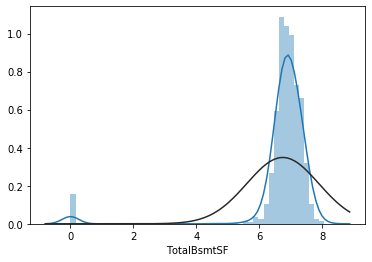

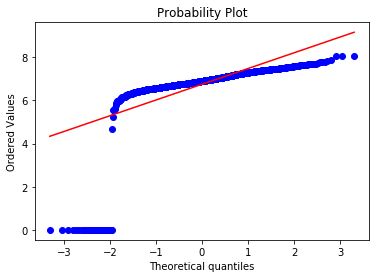

In [150]:
### Zero values for TotalBsmtSF, need to create binary variate and log tranform those non zero values
sns.distplot(df.TotalBsmtSF,fit=norm)
fig = plt.figure()
stats.probplot(df.TotalBsmtSF,plot=plt)

#### Create binary variable and transform the data for those non zero values using Log transforamtion

In [136]:
df['HasBsmt']=pd.Series(len(df.TotalBsmtSF),index=df.index)
df['HasBsmt']=0
df.loc[df.TotalBsmtSF>0,'HasBsmt']=1

In [141]:
df.loc[df.HasBsmt==1,'TotalBsmtSF']=np.log(df.TotalBsmtSF)

((array([-3.29734785, -3.03957662, -2.89619317, ...,  2.89619317,
          3.03957662,  3.29734785]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.03722003, 8.07090609,
         8.07277933])),
 (0.3538649722538122, 6.923661865160317, 0.9912372939608382))

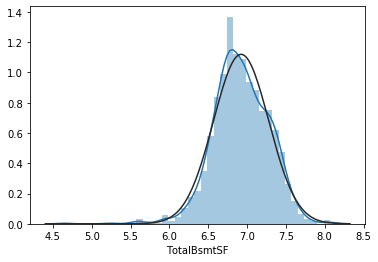

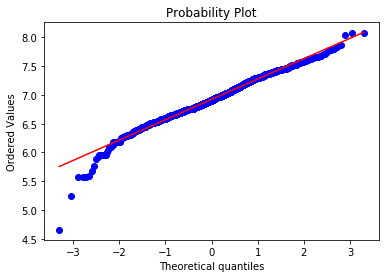

In [146]:
## Create prob plot and normal distribution plot
sns.distplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'],fit=norm)
fig= plt.figure()
stats.probplot(df[df.TotalBsmtSF>0]['TotalBsmtSF'],plot=plt)

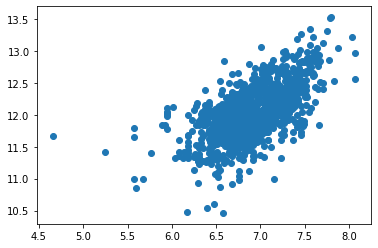

In [154]:
plt.scatter(df[df.TotalBsmtSF>0]['TotalBsmtSF'],df[df.TotalBsmtSF>0]['SalePrice'])

#### Dummy Variables convert categorical variables into dummy variables

In [157]:
pd.get_dummies(df)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,6.752270,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,978,0,284,7.140453,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,486,0,434,6.824374,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,216,0,540,6.628041,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,655,0,490,7.043160,...,0,0,0,1,0,0,0,0,1,0
6,50,14115,5,5,1993,1995,732,0,64,6.679599,...,0,0,0,1,0,0,0,0,1,0
7,20,10084,8,5,2004,2005,1369,0,317,7.430114,...,0,0,0,1,0,0,0,0,1,0
8,60,10382,7,6,1973,1973,859,32,216,7.009409,...,0,0,0,1,0,0,0,0,1,0
9,50,6120,7,5,1931,1950,0,0,952,6.858565,...,0,0,0,1,1,0,0,0,0,0


## Regression Model

In [21]:
## OverallQual(0.79), GrLivArea(0.7),GarageCars(0.64),TotalBsmtSF(0.61)
